In [0]:
!wget https://www.curiousily.com/media/ml-scratch-4/ui1.png

--2019-04-20 07:53:55--  https://www.curiousily.com/media/ml-scratch-4/ui1.png
Resolving www.curiousily.com (www.curiousily.com)... 167.99.137.12
Connecting to www.curiousily.com (www.curiousily.com)|167.99.137.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 487525 (476K) [image/png]
Saving to: ‘ui1.png’

ui1.png             100%[===================>] 476.10K   648KB/s    in 0.7s    

2019-04-20 07:53:56 (648 KB/s) - ‘ui1.png’ saved [487525/487525]



In [0]:
!wget https://www.curiousily.com/media/ml-scratch-4/ui2.png

--2019-04-20 07:53:58--  https://www.curiousily.com/media/ml-scratch-4/ui2.png
Resolving www.curiousily.com (www.curiousily.com)... 167.99.137.12
Connecting to www.curiousily.com (www.curiousily.com)|167.99.137.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 207398 (203K) [image/png]
Saving to: ‘ui2.png’

ui2.png             100%[===================>] 202.54K   481KB/s    in 0.4s    

2019-04-20 07:53:58 (481 KB/s) - ‘ui2.png’ saved [207398/207398]



In [0]:
!wget https://www.curiousily.com/media/ml-scratch-4/ui3.png

--2019-04-20 07:54:01--  https://www.curiousily.com/media/ml-scratch-4/ui3.png
Resolving www.curiousily.com (www.curiousily.com)... 167.99.137.12
Connecting to www.curiousily.com (www.curiousily.com)|167.99.137.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 188948 (185K) [image/png]
Saving to: ‘ui3.png’

ui3.png             100%[===================>] 184.52K   584KB/s    in 0.3s    

2019-04-20 07:54:01 (584 KB/s) - ‘ui3.png’ saved [188948/188948]



In [0]:
from math import sqrt
import random
try:
  import Image
except ImportError:
  from PIL import Image

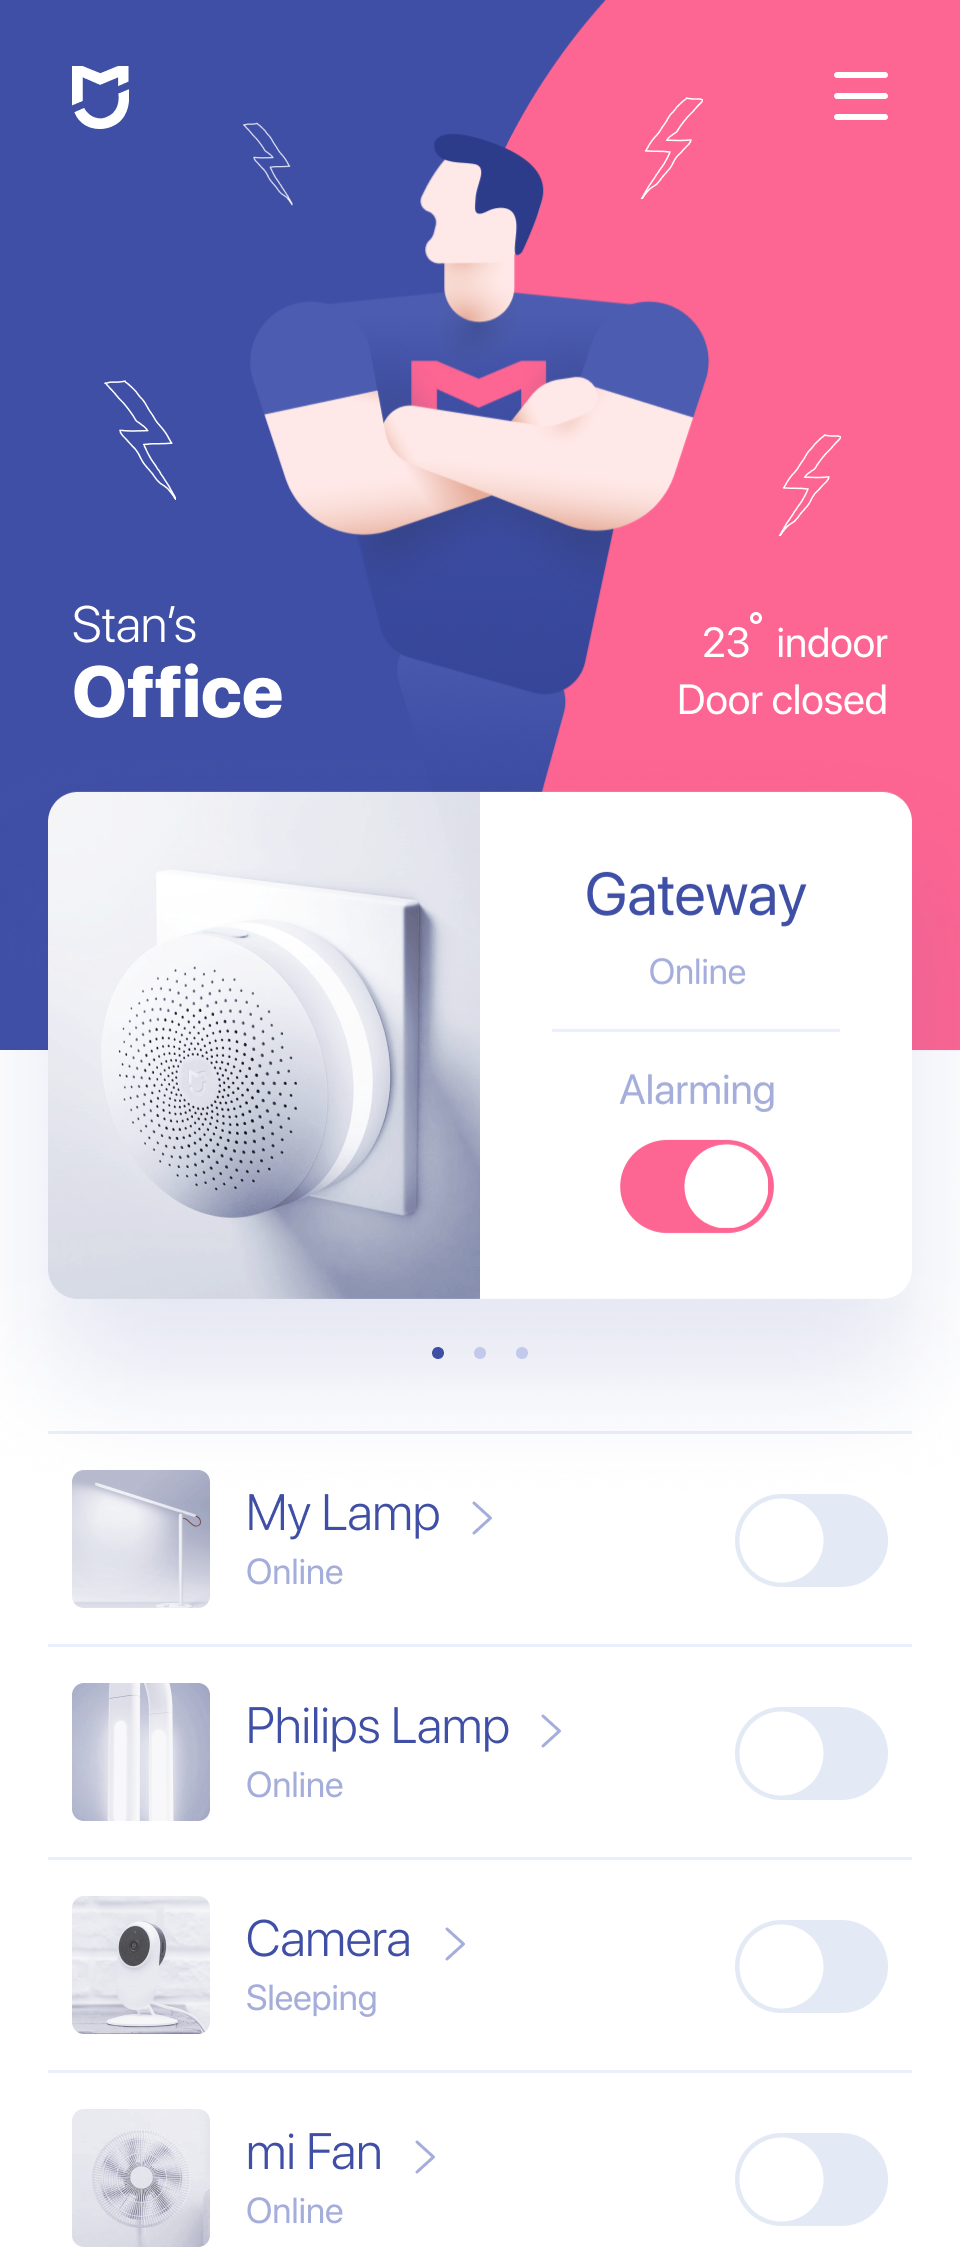

In [0]:
from IPython.display import Image as CImage
CImage("ui1.png", width=350, height=700)

In [0]:
class Point:
  
  def __init__(self, coordinates):
    self.coordinates = coordinates

In [0]:
class Cluster:
  
  def __init__(self, center, points):
    self.center = center
    self.points = points

In [0]:
class KMeans:
  
  def __init__(self, n_clusters, min_diff = 1):
    self.n_clusters = n_clusters
    self.min_diff = min_diff
    
  def calculate_center(self, points):    
    n_dim = len(points[0].coordinates)    
    vals = [0.0 for i in range(n_dim)]    
    for p in points:
      for i in range(n_dim):
        vals[i] += p.coordinates[i]
    coords = [(v / len(points)) for v in vals]    
    return Point(coords)
  
  def assign_points(self, clusters, points):
    plists = [[] for i in range(self.n_clusters)]

    for p in points:
      smallest_distance = float('inf')

      for i in range(self.n_clusters):
        distance = euclidean(p, clusters[i].center)
        if distance < smallest_distance:
          smallest_distance = distance
          idx = i

      plists[idx].append(p)
    
    return plists
    
  def fit(self, points):
    clusters = [Cluster(center=p, points=[p]) for p in random.sample(points, self.n_clusters)]
    
    while True:

      plists = self.assign_points(clusters, points)

      diff = 0

      for i in range(self.n_clusters):
        if not plists[i]:
          continue
        old = clusters[i]
        center = self.calculate_center(plists[i])
        new = Cluster(center, plists[i])
        clusters[i] = new
        diff = max(diff, euclidean(old.center, new.center))

      if diff < self.min_diff:
        break

    return clusters

In [0]:
def euclidean(p, q):
  n_dim = len(p.coordinates)
  return sqrt(sum([
      (p.coordinates[i] - q.coordinates[i]) ** 2 for i in range(n_dim)
  ]))

In [0]:
def get_points(image_path):  
  img = Image.open(image_path)
  img.thumbnail((200, 400))
  img = img.convert("RGB")
  w, h = img.size
  
  points = []
  for count, color in img.getcolors(w * h):
    for _ in range(count):
      points.append(Point(color))
    
  return points

In [0]:
def rgb_to_hex(rgb):
  return '#%s' % ''.join(('%02x' % p for p in rgb))

def get_colors(filename, n_colors=3):
  points = get_points(filename)
  clusters = KMeans(n_clusters=n_colors).fit(points)
  clusters.sort(key=lambda c: len(c.points), reverse = True)
  rgbs = [map(int, c.center.coordinates) for c in clusters]
  return list(map(rgb_to_hex, rgbs))

In [0]:
colors = get_colors('ui3.png', n_colors=5)

In [0]:
", ".join(colors)

'#f3f4f4, #fefefe, #05ddad, #3959ad, #bacfd9'